In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('../dataset/gretel_generated_table_2024-10-01-05-35-45.csv')

In [3]:
le = LabelEncoder()
data['ProductUsageFrequency'] = le.fit_transform(data['ProductUsageFrequency'])

In [4]:
features = [
    'ContractLength', 'MonthsSinceSignup', 'TotalTransactions', 
    'AvgTransactionValue', 'TotalRevenue', 'ProductUsageFrequency', 
    'SupportTicketsOpened', 'SupportTicketResolutionTime', 
    'EmailOpenRate', 'AccountManagerCalls', 'ChurnStatus'
]

In [5]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

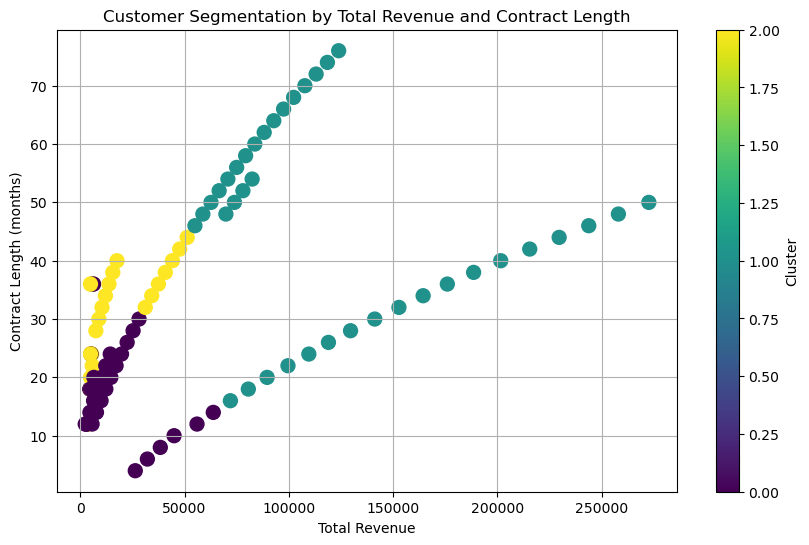

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(data['TotalRevenue'], data['ContractLength'], c=data['Cluster'], cmap='viridis', s=100)
plt.title('Customer Segmentation by Total Revenue and Contract Length')
plt.xlabel('Total Revenue')
plt.ylabel('Contract Length (months)')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()